# Partie 3 : Modélisation

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import activations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data.csv').dropna(subset = ['Température (°C)', 'Précipitations (3 heures)', 'Humidité (%)', 'Vitesse du vent (m/s)'])
df_feu = df[df['Départ de feu'] == 1]
df_feu = df_feu.drop(columns = ['Départ de feu'])
df_feu = df_feu.sort_values(['Date de première alerte'])
df_feu = df_feu.reset_index(drop = True)
df_feu.head()

C:\Users\theoc\anaconda3\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2,3,4,5,6,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Année,Date de première alerte,Département,Commune,Code postal,Code INSEE,Latitude commune,Longitude commune,Surface brûlée (m2),Surface forêt (m2),...,Station la plus proche,id_station,Latitude station,Longitude station,Altitude station,Date,Température (°C),Précipitations (3 heures),Humidité (%),Vitesse du vent (m/s)
0,2006.0,2006-01-01 12:50:00,66,SAINT LAURENT DE CERDANS,66260,66179,42.3833,2.61667,10000.0,10000.0,...,PERPIGNAN,7747.0,42.737167,2.872833,42.0,2006-01-01 12:00:00,11.7,0.0,50.0,8.7
1,2006.0,2006-01-01 12:56:00,66,SALSES LE CHATEAU,66600,66190,42.8328,2.91889,20000.0,0.0,...,PERPIGNAN,7747.0,42.737167,2.872833,42.0,2006-01-01 12:00:00,11.7,0.0,50.0,8.7
2,2006.0,2006-01-01 15:40:00,83,CALLAS,83830,83028,43.5833,6.53333,30.0,30.0,...,NICE,7690.0,43.648833,7.209000,2.0,2006-01-01 15:00:00,10.4,0.0,76.0,6.2
3,2006.0,2006-01-02 18:19:00,34,ROUJAN,34320,34237,43.5167,3.30000,37500.0,10000.0,...,MONTPELLIER,7643.0,43.577000,3.963167,2.0,2006-01-02 18:00:00,7.5,0.0,54.0,4.1
4,2006.0,2006-01-02 20:57:00,83,DRAGUIGNAN,83300,83050,43.5333,6.46667,200.0,200.0,...,NICE,7690.0,43.648833,7.209000,2.0,2006-01-02 21:00:00,6.8,0.0,64.0,4.1


In [3]:
df_feu.dtypes

Année                                        float64
Date de première alerte                       object
Département                                   object
Commune                                       object
Code postal                                   object
Code INSEE                                    object
Latitude commune                             float64
Longitude commune                            float64
Surface brûlée (m2)                          float64
Surface forêt (m2)                           float64
Surface autres terres boisées (m2)           float64
Surfaces non boisées naturelles (m2)         float64
Surfaces non boisées artificialisées (m2)    float64
Surfaces non boisées (m2)                    float64
Station la plus proche                        object
id_station                                   float64
Latitude station                             float64
Longitude station                            float64
Altitude station                             f

In [4]:
values = df_feu.values
values

array([[2006.0, '2006-01-01 12:50:00', '66', ..., 0.0, 50.0, 8.7],
       [2006.0, '2006-01-01 12:56:00', '66', ..., 0.0, 50.0, 8.7],
       [2006.0, '2006-01-01 15:40:00', '83', ..., 0.0, 76.0, 6.2],
       ...,
       [2019.0, '2019-12-28 17:36:00', '40', ..., 0.0, 88.0, 1.5],
       [2019.0, '2019-12-30 17:05:00', '83', ..., 0.0, 80.0, 3.6],
       [2019.0, '2019-12-30 18:16:00', '2B', ..., 0.0, 67.0, 2.5]],
      dtype=object)

In [5]:
x = values[:,[22,23]].astype(float)
y = values[:,8].astype(float)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [7]:
x_train.shape

(22964, 2)

In [24]:
model = Sequential()

model.add(Dense(500, input_dim = 2, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = "mean_squared_error" , optimizer = "adam", metrics = ["mean_squared_error"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 500)               1500      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 56,701
Trainable params: 56,701
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(x_train, y_train, epochs = 20, verbose = 1, validation_data=(x_test, y_test))

Epoch 1/20
718/718 [==============================] - 3s 4ms/step - loss: 219317174272.0000 - mean_squared_error: 219317174272.0000 - val_loss: 140852658176.0000 - val_mean_squared_error: 140852658176.0000
Epoch 2/20
718/718 [==============================] - 2s 3ms/step - loss: 219040202752.0000 - mean_squared_error: 219040202752.0000 - val_loss: 140764200960.0000 - val_mean_squared_error: 140764200960.0000
Epoch 3/20
718/718 [==============================] - 2s 3ms/step - loss: 218941440000.0000 - mean_squared_error: 218941440000.0000 - val_loss: 140679118848.0000 - val_mean_squared_error: 140679118848.0000
Epoch 4/20
718/718 [==============================] - 2s 3ms/step - loss: 218789625856.0000 - mean_squared_error: 218789625856.0000 - val_loss: 140570066944.0000 - val_mean_squared_error: 140570066944.0000
Epoch 5/20
718/718 [==============================] - 2s 3ms/step - loss: 218578960384.0000 - mean_squared_error: 218578960384.0000 - val_loss: 140393971712.0000 - val_mean_squ

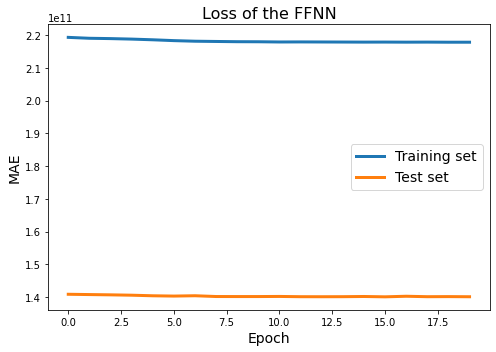

In [26]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['loss'], lw=3, label='Training set')
plt.plot(history.epoch, history.history['val_loss'], lw=3, label='Test set')
plt.legend(fontsize=14)
plt.title('Loss of the FFNN', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.tight_layout()

In [27]:
pred_train = model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

466654.5058136352
374297.6606975381


In [ ]:
confusion_matrix(y_true, y_pred)